In [224]:
import numpy as np
import pandas as pd
from pyvi import ViTokenizer
import glob
from collections import Counter
from string import punctuation

In [225]:
stop_word = []
with open("stop_word.txt",encoding="utf-8") as f :
    text = f.read()
    for word in text.split() :
        stop_word.append(word)
    f.close()

In [134]:
punc = list(punctuation)
stop_word = stop_word + punc
print(stop_word)

['bị', 'bởi', 'cả', 'các', 'cái', 'cần', 'càng', 'chỉ', 'chiếc', 'cho', 'chứ', 'chưa', 'chuyện', 'có', 'có_thể', 'cứ', 'của', 'cùng', 'cũng', 'đã', 'đang', 'đây', 'để', 'đến_nỗi', 'đều', 'điều', 'do', 'đó', 'được', 'dưới', 'gì', 'khi', 'không', 'là', 'lại', 'lên', 'lúc', 'mà', 'mỗi', 'một_cách', 'này', 'nên', 'nếu', 'ngay', 'nhiều', 'như', 'nhưng', 'những', 'nơi', 'nữa', 'phải', 'qua', 'ra', 'rằng', 'rằng', 'rất', 'rất', 'rồi', 'sau', 'sẽ', 'so', 'sự', 'tại', 'theo', 'thì', 'trên', 'trước', 'từ', 'từng', 'và', 'vẫn', 'vào', 'vậy', 'vì', 'việc', 'với', 'vừa', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [226]:
#Tokenizer
paths = glob.glob("./comment/*.txt")
comments = []
for path in paths :
    with open(path,encoding="utf-8") as file:
        text= file.read()
        text_lower = text.lower()
        text_token = ViTokenizer.tokenize(text_lower)
        comments.append(text_token)
    file.close()
    

In [227]:
# làm sạch data
sentences = []
for comment in comments:
    sent = []
    for word in comment.split(" ") :
            if (word not in stop_word) :
                if ("_" in word) or (word.isalpha() == True):
                    sent.append(word)
    sentences.append(" ".join(sent))    

In [229]:
path_score = glob.glob("./score/*.txt")
scores = []
for path in path_score:
    with open(path) as f :
        file = f.read()
        scores.append(file)
        f.close()
        

In [230]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [231]:
tf = TfidfVectorizer(min_df=5,max_df= 0.8,max_features=3000,sublinear_tf=True)

In [232]:
tf.fit(sentences)
X = tf.transform(sentences)

In [233]:
from sklearn.preprocessing import Binarizer
binaray = Binarizer(threshold=6)
y = binaray.fit_transform(y_score)
y = np.array(y).flatten()

In [234]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [235]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10,shuffle=True)

In [236]:
model = LogisticRegression()

In [237]:
model.fit(X_train,y_train)
y_pre = model.predict(X_test)

In [238]:
print(confusion_matrix(y_test,y_pre))

[[  43  148]
 [   7 1545]]


In [239]:
print(classification_report(y_test,y_pre))

             precision    recall  f1-score   support

        0.0       0.86      0.23      0.36       191
        1.0       0.91      1.00      0.95      1552

avg / total       0.91      0.91      0.89      1743



In [240]:
print(classification_report(y_train,model.predict(X_train)))

             precision    recall  f1-score   support

        0.0       0.99      0.28      0.44       500
        1.0       0.91      1.00      0.95      3566

avg / total       0.92      0.91      0.89      4066



In [276]:
text =[["quán nấu dở quá"],["đồ ăn bình_thường"],["quán nấu ngon"]]
for i in text:
    test = tf.transform(i)
    print(model.predict(test))


[ 0.]
[ 1.]
[ 1.]


In [277]:
import wordcloud
import matplotlib.pyplot as plt
%matplotlib inline

In [278]:
cloud = np.array(sentences).flatten()

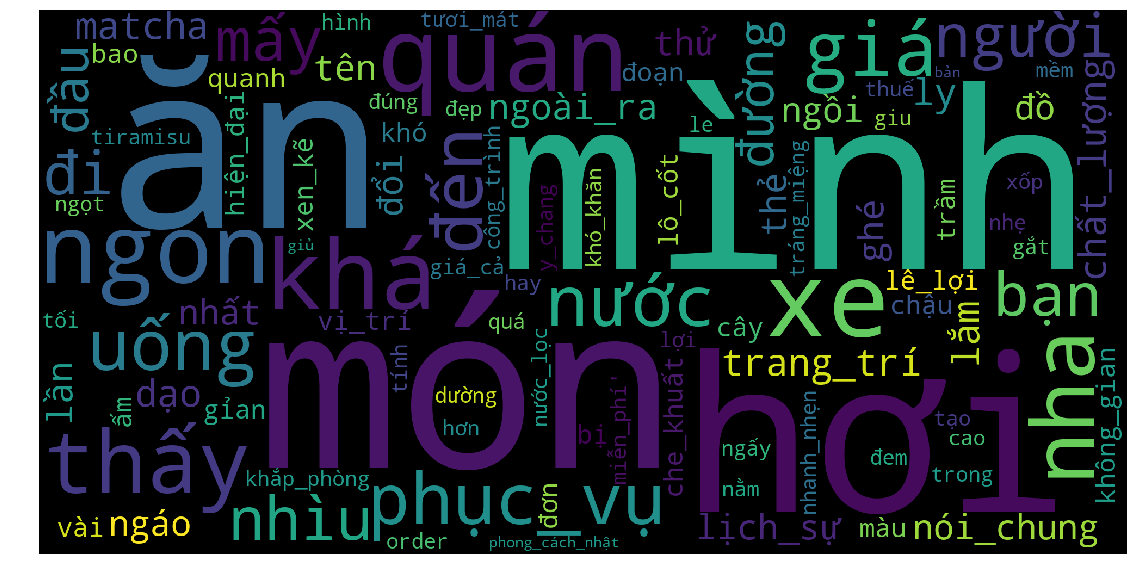

In [279]:
plt.figure(figsize=(20,10))
word_cloud = wordcloud.WordCloud(max_words=100,background_color ="black",
                                 width=2000,height=1000,mode="RGB").generate(str(cloud))
plt.axis("off")
plt.imshow(word_cloud)
